# Email Spam Classifier

## Importing librearies

In [1]:
import pandas as pd
from nltk.corpus import stopwords 
import numpy as np
import seaborn as sns
import string
from wordcloud import wordcloud,STOPWORDS
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [2]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
unwanted = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

df.drop(unwanted,axis =1,inplace=True)

df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.rename(columns={'v1':'spam','v2':'text'},inplace=True)

In [7]:
df.head()

,spam,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Count of the dataset

In [8]:
df.describe()

,spam,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


c:\Users\murth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\murth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\murth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


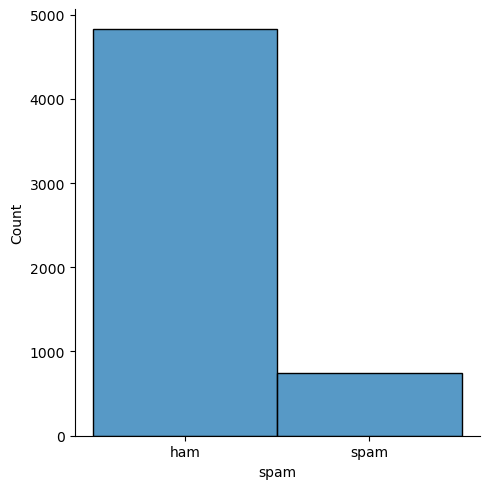

In [9]:
sns.displot(df.spam)

## Dealing with Inbalance dataset

In [10]:
df_ham = df[df['spam']=='ham']

In [11]:
df_spam = df[df['spam']=='spam']

In [12]:
df_ham.shape

(4825, 2)

In [13]:
df_spam.shape

(747, 2)

In [14]:
df_downsample = df_ham.sample(df_spam.shape[0])

In [15]:
df_downsample.shape

(747, 2)

In [16]:
df_new = pd.concat([df_downsample,df_spam])

c:\Users\murth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\murth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\murth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


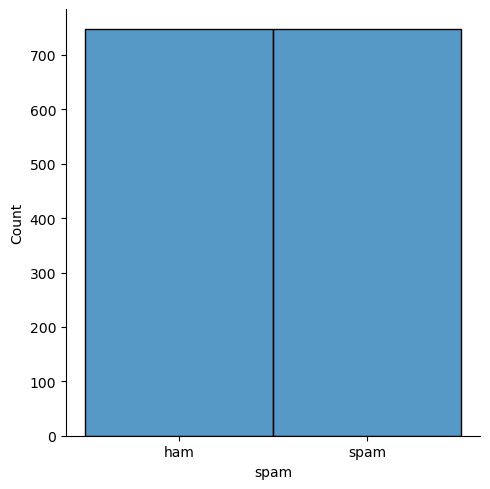

In [17]:
sns.displot(df_new.spam)

## Data Cleaning

In [18]:
df_new['text'].head()

5329                        Sir, waiting for your letter.
1617                        Did u download the fring app?
4308    He dint tell anything. He is angry on me that ...
1737    I cant pick the phone right now. Pls send a me...
3033      Get ready for  &lt;#&gt;  inches of pleasure...
Name: text, dtype: object

In [19]:
for i in range(len(df['text'])):
    if i < 5:
        print(df['text'][i])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though


In [20]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Data visualiztion

In [21]:
# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(df_ham.text.to_numpy().tolist())
spam_msg_text = " ".join(df_spam.text.to_numpy().tolist())

In [22]:
ham_msg_text

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today. I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i\'m watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if thatåÕs the way u feel. ThatåÕs the wa

In [23]:
def word(text): 
   # wordcloud of ham messages
    ham_msg_cloud = wordcloud.WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(text)
    plt.figure(figsize=(16,10))
    plt.imshow(ham_msg_cloud, interpolation='bilinear')
    plt.axis('off') # turn off axis
    plt.show()

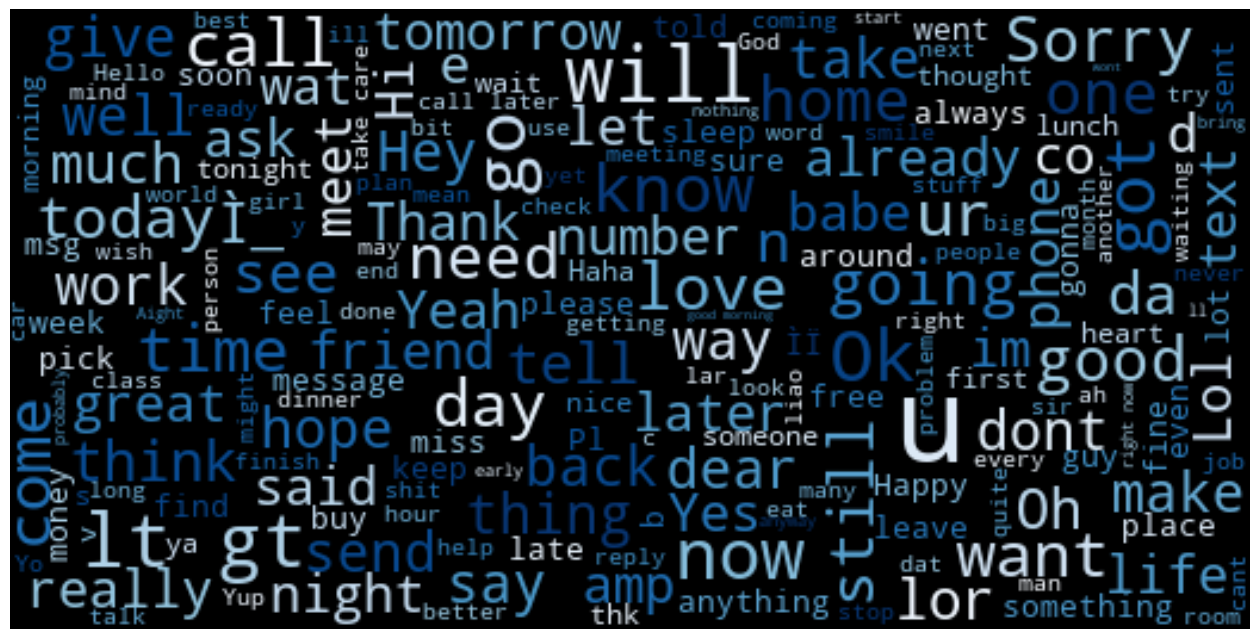

In [24]:
word(ham_msg_text)

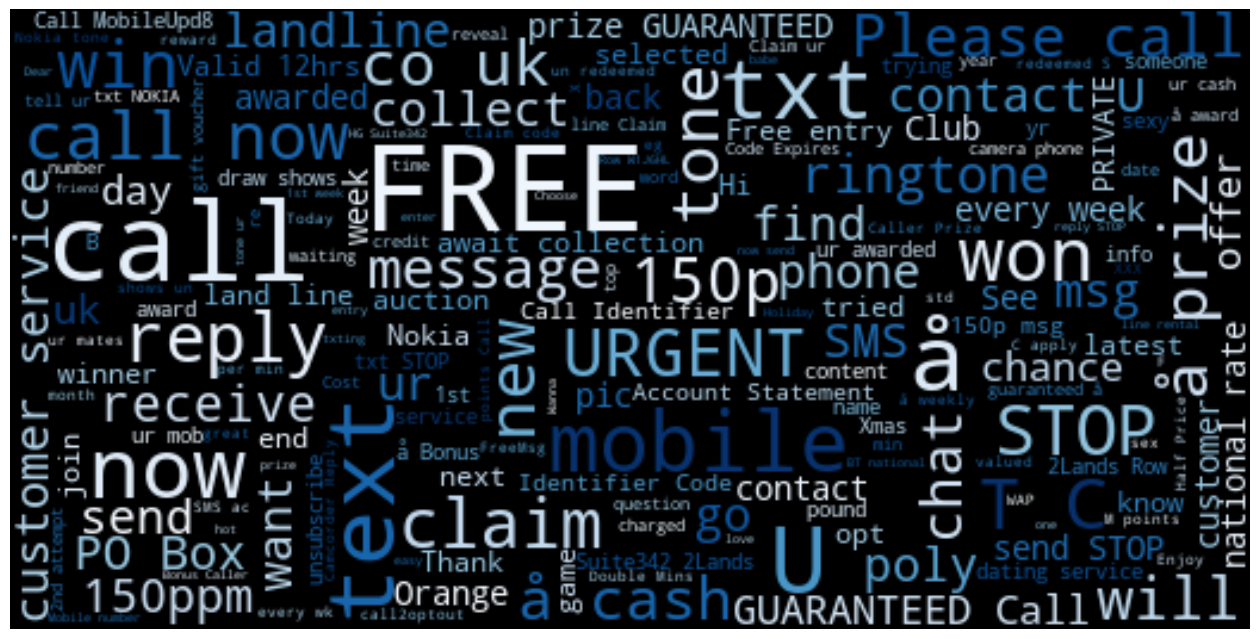

In [25]:
word(spam_msg_text)

## Removing 

In [26]:
df_new.shape

(1494, 2)

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df_new.shape

(1494, 2)

In [29]:
import nltk
from nltk.stem.porter import PorterStemmer
import re

pr = PorterStemmer()

# clean_words = []

def process_words(text):    
   
    # Removing Punctuation
    nopun = [chir for chir in text if chir not in string.punctuation]
   
    # Joining the char into words again
    nopun = ''.join(nopun)
  
    # tokenize the word
    token = nltk.word_tokenize(nopun)
 
    # find the root word  ad removing Stop words
    with_stem_words = [pr.stem(word) for word in nopun.split() if word.lower() not in stopwords.words('english')]
  
    return with_stem_words
    

In [30]:
df_new['text'].head().apply(process_words)

5329                             [sir, wait, letter]
1617                       [u, download, fring, app]
4308           [dint, tell, anyth, angri, told, abi]
1737    [cant, pick, phone, right, pl, send, messag]
3033               [get, readi, ltgt, inch, pleasur]
Name: text, dtype: object

## Vectorize the text

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(lowercase=False)

X = cv.fit_transform(df_new['text'])


In [32]:
X.shape

(1494, 5463)

In [33]:
df_new.shape

(1494, 2)

In [34]:
y = pd.get_dummies(df_new['spam'],drop_first=True)

In [35]:
y.shape

(1494, 1)

In [36]:
y.head()

,spam
5329,False
1617,False
4308,False
1737,False
3033,False


In [37]:
df_new['spam'].head()

5329    ham
1617    ham
4308    ham
1737    ham
3033    ham
Name: spam, dtype: object

## Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

X_train.shape


(1195, 5463)

In [39]:
y_train.shape

(1195, 1)

## Model Selection

In [40]:
def scores(m, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    ms = {}
    
    for n, model in m.items():
        model.fit(X_train,y_train)
        ms[n] = model.score(X_test,y_test)

    ms = pd.DataFrame(ms, index=['Score']).transpose()
    ms = ms.sort_values('Score')
        
    return ms

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

models = {'MultinomialNB': MultinomialNB(),
          'RandomForestClassifier':  RandomForestClassifier(n_estimators=800,max_features=200),
          }

In [42]:
results  = scores(models, X_train, X_test, y_train, y_test)

c:\Users\murth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\murth\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [43]:
results

,Score
RandomForestClassifier,0.943144
MultinomialNB,0.963211


c:\Users\murth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\murth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\murth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


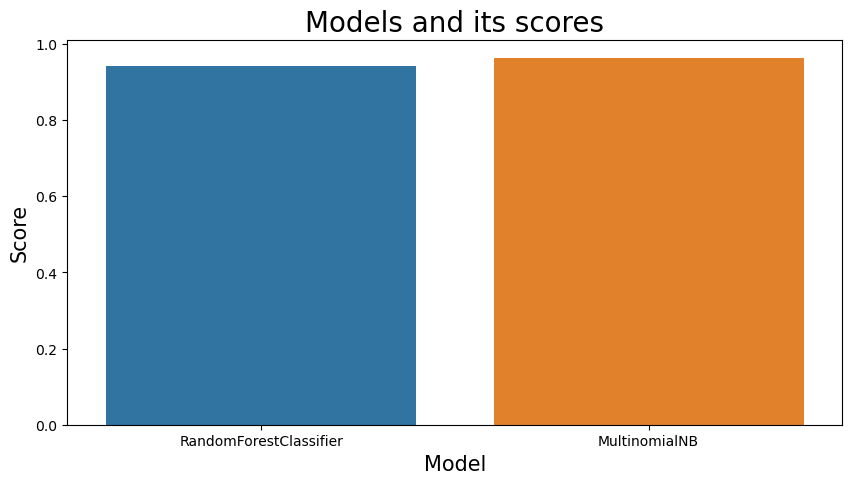

In [44]:
plt.figure(figsize=(10, 5))
plt.xlabel('Model', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.title("Models and its scores", fontsize=20)
sns.barplot(x=results.index, y=results.Score.values,);

In [45]:
from sklearn.ensemble import RandomForestClassifier

rfClassifier = RandomForestClassifier(n_estimators=800,max_features=200).fit(X_train,y_train)

c:\Users\murth\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [46]:
rfpred = rfClassifier.predict(X_test)

print(classification_report(y_test,rfpred))

              precision    recall  f1-score   support

       False       0.90      1.00      0.94       145
        True       1.00      0.89      0.94       154

    accuracy                           0.94       299
   macro avg       0.95      0.94      0.94       299
weighted avg       0.95      0.94      0.94       299



In [47]:
rf_cf_matrix =confusion_matrix(y_test,rfpred)
print(rf_cf_matrix)

[[145   0]
 [ 17 137]]


<Axes: >

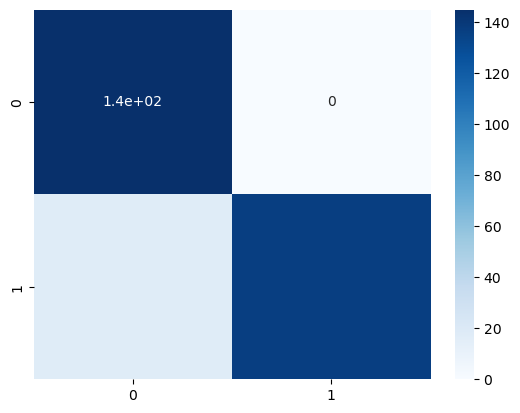

In [48]:
sns.heatmap(rf_cf_matrix,cmap='Blues',annot=True)

In [49]:
print(accuracy_score(y_test,rfpred))

0.9431438127090301


In [50]:
from sklearn.naive_bayes import MultinomialNB

nbclassifier = MultinomialNB().fit(X_train,y_train)


c:\Users\murth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
nbclassifier.classes_

array([False,  True])

In [52]:

nbpred = nbclassifier.predict(X_test)

print(classification_report(y_test,nbpred))


              precision    recall  f1-score   support

       False       0.95      0.98      0.96       145
        True       0.98      0.95      0.96       154

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299



In [53]:
nb_cf_matrix =confusion_matrix(y_test,nbpred)

In [54]:
print(nb_cf_matrix)

[[142   3]
 [  8 146]]


<Axes: >

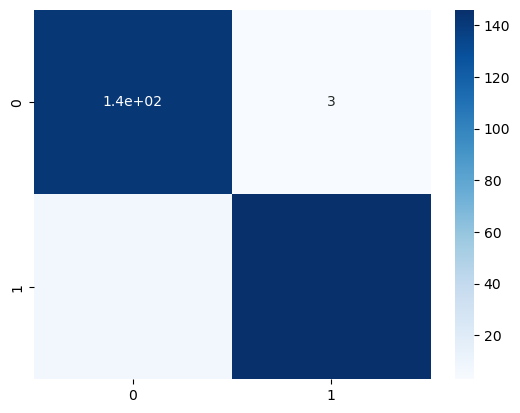

In [55]:
sns.heatmap(nb_cf_matrix,cmap='Blues',annot=True)

In [56]:
print(accuracy_score(y_test,nbpred))

0.9632107023411371


## Saving Model

In [57]:
import pickle

# model 
with open('MultinomialNB.pkl','wb') as f:
    pickle.dump(nbclassifier,f)
    
# Vectorizer
with open('Vectorizer.pkl','wb') as v:
    pickle.dump(cv,v)
